A1. Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data 
and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following 
activities. 
- What is the dimensionality of the vector space for this data? 
- How many vectors exist in this vector space? 
- What is the rank of Matrix A? 
- Using Pseudo-Inverse find the cost of each product available for sale.  
(Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a 
pseudo-inverse.) 

In [ ]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
file_path = r"Lab Session Data.xlsx"  
xls = pd.ExcelFile(file_path)

In [33]:
try:
    df = pd.read_excel(xls, sheet_name="Purchase data")
    purchase_matrix = df.iloc[:, 1:4].values  
    purchase_amounts = df.iloc[:, 4].values.reshape(-1, 1)  
    dimensionality = purchase_matrix.shape[1]
    num_vectors = purchase_matrix.shape[0]
    rank_A = np.linalg.matrix_rank(purchase_matrix)
    purchase_matrix_pinv = np.linalg.pinv(purchase_matrix)
    product_costs = np.dot(purchase_matrix_pinv, purchase_amounts).flatten()  
    print("A1 Results:")
    print(f"Dimensionality: {dimensionality}")
    print(f"Number of Vectors: {num_vectors}")
    print(f"Rank of A: {rank_A}")
    print(f"Product Costs: {product_costs}")
    
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    
except ValueError:  # Catches potential Excel sheet issues
    print("Error: Could not read specified sheet from Excel file.")
    


A1 Results:
Dimensionality: 3
Number of Vectors: 10
Rank of A: 3
Product Costs: [ 1. 55. 18.]


A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products 
available with the vendor.

In [34]:
print(f"Model Vector X: {product_costs}")

Model Vector X: [ 1. 55. 18.]


A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others 
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on 
purchase behavior. 

In [35]:
df = pd.read_excel(xls, sheet_name="Purchase data")
df["Customer Class"] = np.where(df.iloc[:, 4] > 200, "RICH", "POOR")  
print("A3 Result:")
print(df[["Customer Class"]])


A3 Result:
  Customer Class
0           RICH
1           RICH
2           RICH
3           POOR
4           RICH
5           POOR
6           RICH
7           RICH
8           POOR
9           POOR


A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the 
following after loading the data to your programming platform. 
- Calculate the mean and variance of the Price data present in column D.  
(Suggestion: if you use Python, you may use statistics.mean() & 
statistics.variance() methods). 
- Select the price data for all Wednesdays and calculate the sample mean. Compare the mean 
with the population mean and note your observations. 
- Select the price data for the month of Apr and calculate the sample mean. Compare the 
mean with the population mean and note your observations. 
- From the Chg% (available in column I) find the probability of making a loss over the stock. 
(Suggestion: use lambda function to find negative values) 
- Calculate the probability of making a profit on Wednesday. 
- Calculate the conditional probability of making profit, given that today is Wednesday. 
- Make a scatter plot of Chg% data against the day of the week 

A4 Results:
Mean Price: 1560.663453815261
Variance Price: 58732.365352539186
Wednesday Mean Price: 1550.7060000000001
April Mean Price: 1698.9526315789474
Probability of Loss: 0.4979919678714859
Probability of Profit on Wednesday: 0.42


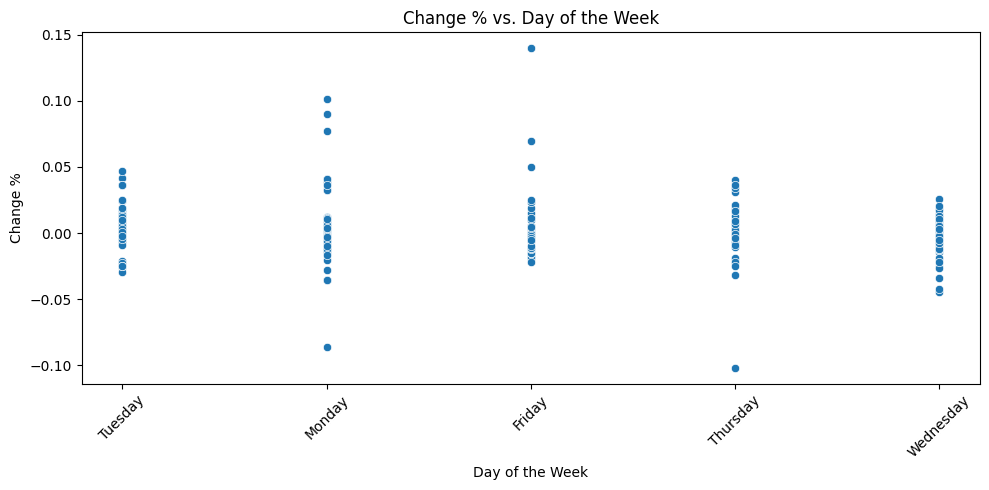

In [36]:
df = pd.read_excel(xls, sheet_name="IRCTC Stock Price")
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day_name()

mean_price = statistics.mean(df["Price"])
variance_price = statistics.variance(df["Price"])
wednesday_mean = df[df["Day"] == "Wednesday"]["Price"].mean()  
april_mean = df[df["Date"].dt.month == 4]["Price"].mean()  
prob_loss = (df["Chg%"] < 0).mean()
prob_profit_wed = df[(df["Day"] == "Wednesday") & (df["Chg%"] > 0)]["Chg%"].count() / df[df["Day"] == "Wednesday"]["Chg%"].count()

print("A4 Results:")
print(f"Mean Price: {mean_price}")
print(f"Variance Price: {variance_price}")
print(f"Wednesday Mean Price: {wednesday_mean}")
print(f"April Mean Price: {april_mean}")
print(f"Probability of Loss: {prob_loss}")
print(f"Probability of Profit on Wednesday: {prob_profit_wed}")

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Day"], y=df["Chg%"])
plt.xlabel("Day of the Week")  # axis labels
plt.ylabel("Change %")
plt.xticks(rotation=45)
plt.title("Change % vs. Day of the Week")
plt.tight_layout() #  prevents labels from overlapping
plt.show()

A5. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the 
following tasks: 
- Study each attribute and associated values present. Identify the datatype (nominal etc.) 
for the attribute. 
- For categorical attributes, identify the encoding scheme to be employed. (Guidance: 
employ label encoding for ordinal variables while One-Hot encoding may be employed 
for nominal variables). 
- Study the data range for numeric variables. 
- Study the presence of missing values in each attribute. 
- Study presence of outliers in data.  
- For numeric variables, calculate the mean and variance (or standard deviation). 

In [37]:
df = pd.read_excel(xls, sheet_name="thyroid0387_UCI")
df.replace('?', np.nan, inplace=True)
df = df.infer_objects()  # Ensures proper type conversion
missing_values = df.isnull().sum()

# Converts categorical columns to string for Label Encoding 
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Converts to string
    df[col] = LabelEncoder().fit_transform(df[col])

print("A5 Results:")
print(df.describe())
print("Missing Values:\n", missing_values)

A5 Results:
          Record ID           age          sex  on thyroxine  \
count  9.172000e+03   9172.000000  9172.000000   9172.000000   
mean   8.529473e+08     73.555822     0.371348      0.135194   
std    7.581969e+06   1183.976718     0.548110      0.341949   
min    8.408010e+08      1.000000     0.000000      0.000000   
25%    8.504090e+08     37.000000     0.000000      0.000000   
50%    8.510040e+08     55.000000     0.000000      0.000000   
75%    8.607110e+08     68.000000     1.000000      0.000000   
max    8.701190e+08  65526.000000     2.000000      1.000000   

       query on thyroxine  on antithyroid medication         sick  \
count         9172.000000                9172.000000  9172.000000   
mean             0.016681                   0.012647     0.037505   
std              0.128081                   0.111752     0.190007   
min              0.000000                   0.000000     0.000000   
25%              0.000000                   0.000000     0.000000 

C:\Users\Praanesh Nair\AppData\Local\Temp\ipykernel_2876\4224358239.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data 
variables. Employ following guidance. 
- Mean may be used when the attribute is numeric with no outliers 
- Median may be employed for attributes which are numeric and contain outliers 
- Mode may be employed for categorical attributes 

In [38]:
df = pd.read_excel(xls, sheet_name="thyroid0387_UCI")
df.replace('?', np.nan, inplace=True)
df = df.infer_objects()

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("A6 Results:")
print(df)

A6 Results:
      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f

C:\Users\Praanesh Nair\AppData\Local\Temp\ipykernel_2876\2240753025.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


A7. Data Normalization / Scaling: from the data study, identify the attributes which may need 
normalization. Employ appropriate normalization techniques to create normalized set of data. 

In [39]:

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("A7 Results:")
print(df)

A7 Results:
         Record ID       age  sex  on thyroxine  query on thyroxine  \
0     0.000000e+00  0.000427    0             0                   0   
1     3.410871e-08  0.000427    0             0                   0   
2     9.891527e-07  0.000610    0             0                   0   
3     6.934301e-05  0.000534    0             0                   0   
4     6.937712e-05  0.000473    0             0                   0   
...            ...       ...  ...           ...                 ...   
9167  9.999996e-01  0.000839    1             0                   0   
9168  9.999996e-01  0.000320    1             0                   0   
9169  9.999997e-01  0.001038    1             0                   0   
9170  9.999997e-01  0.000702    0             0                   0   
9171  1.000000e+00  0.000458    1             0                   0   

      on antithyroid medication  sick  pregnant  thyroid surgery  \
0                             0     0         0                0   

A8. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. Use first vector for each document for this. Compare the values for JC and SMC and judge the appropriateness of each of them.

$$JC = \frac{f_{11}}{f_{01} + f_{10} + f_{11}}$$
$$SMC = \frac{f_{11} + f_{00}}{f_{00} + f_{01} + f_{10} + f_{11}}$$

In [40]:
vector1 = df.iloc[0, :].values
vector2 = df.iloc[1, :].values
f11 = np.sum((vector1 == 1) & (vector2 == 1))
f00 = np.sum((vector1 == 0) & (vector2 == 0))
f10 = np.sum((vector1 == 1) & (vector2 == 0))
f01 = np.sum((vector1 == 0) & (vector2 == 1))

# Check for division by zero
denominator = (f01 + f10 + f11)
JC = f11 / denominator if denominator != 0 else 0  # Handles the case where all are 0
SMC = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0

print("A8 Results:")
print(f"Jaccard Coefficient: {JC}, SMC: {SMC}")

A8 Results:
Jaccard Coefficient: 0.25, SMC: 0.8571428571428571


A9. Cosine Similarity Measure: Now take the complete vectors for these two observations (including 
all the attributes). Calculate the Cosine similarity between the documents by using the second 
feature vector for each document. 

In [41]:
vector1 = df.iloc[0, :].values.reshape(1, -1)
vector2 = df.iloc[1, :].values.reshape(1, -1)
result = cosine_similarity(vector1, vector2)[0][0]
print("A9 Result:", result)

A9 Result: 0.9977009625064738


A10. Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS 
between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient 
calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.  

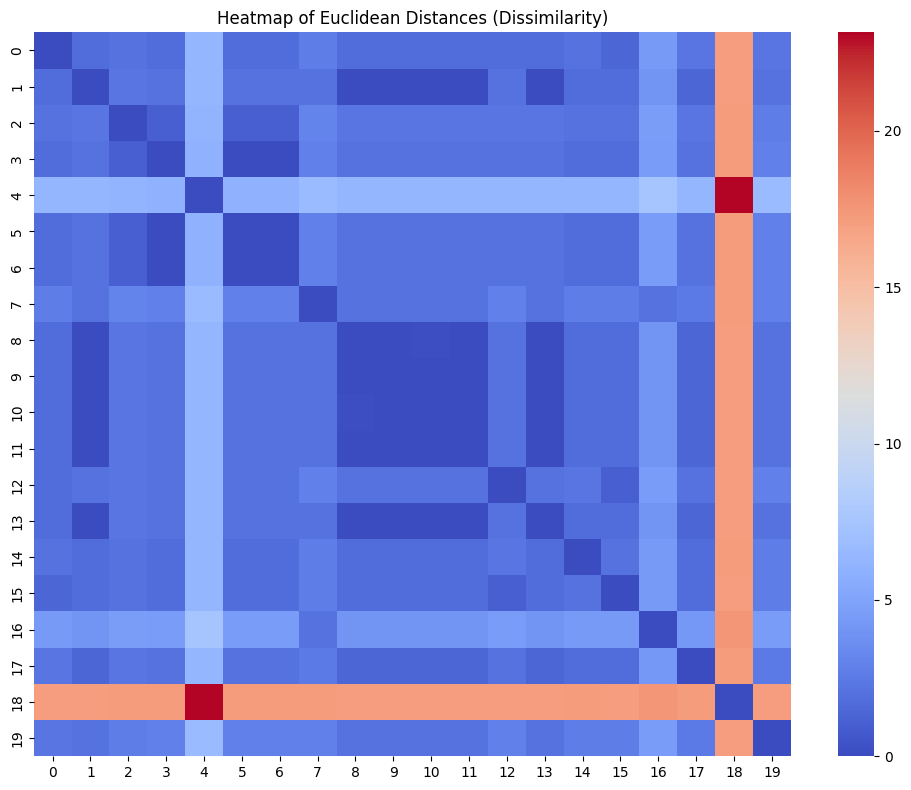

In [42]:
df_subset = df.iloc[:20, :]  # Uses a subset for better visualization
similarity_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        if i != j:
            similarity_matrix[i, j] = np.linalg.norm(df_subset.iloc[i] - df_subset.iloc[j])  # Euclidean distance

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=False, cmap='coolwarm')  # (annot=False) for cleaner heatmap
plt.title("Heatmap of Euclidean Distances (Dissimilarity)")
plt.tight_layout()
plt.show()